In [22]:
#loading virtual python ENV
!source ./bin/activate

In [24]:
import pandas as pd 
from sklearn.impute import SimpleImputer # fixing missing values 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#Day 2: DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
df2 = pd.read_csv('https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv')

In [6]:
url = 'https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv'
df = pd.read_csv(url)
print(df)

                          time   latitude   longitude  depth   mag magType  \
0     2025-04-03T03:16:50.230Z  38.840668 -122.834335   1.32  0.53      md   
1     2025-04-03T03:08:03.540Z  61.556800 -141.271600  13.40  1.20      ml   
2     2025-04-03T02:59:56.724Z  61.789200 -149.608200  38.70  1.20      ml   
3     2025-04-03T02:54:35.248Z  60.081400 -152.528700  97.80  1.40      ml   
4     2025-04-03T02:41:42.280Z  35.639833 -117.548500   8.08  0.89      ml   
...                        ...        ...         ...    ...   ...     ...   
9588  2025-03-04T03:25:43.640Z  44.739000 -111.123333   7.15 -0.37      md   
9589  2025-03-04T03:24:58.760Z  37.428500 -119.018500   3.69  1.70      md   
9590  2025-03-04T03:22:28.320Z  44.726000 -111.120667   2.38 -0.92      md   
9591  2025-03-04T03:20:13.493Z -57.288500  147.327500  10.00  4.50      mb   
9592  2025-03-04T03:18:45.450Z  39.360500 -111.194500  -0.61  1.44      md   

       nst    gap       dmin   rms  ...                   updat

In [7]:
#checking basic metadata infor
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [8]:
#printing top 5 rows
df2.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [9]:
#bottom 5 rows
df2.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9588,2025-03-04T03:25:43.640Z,44.7390,-111.123333,7.15,-0.37,md,7.0,78.0,0.05325,0.11,...,2025-03-04T22:44:36.140Z,"6 km ESE of Hebgen Lake Estates, Montana",earthquake,0.33,1.410,0.371060,4.0,reviewed,uu,uu
9589,2025-03-04T03:24:58.760Z,37.4285,-119.018500,3.69,1.70,md,28.0,91.0,0.07198,0.06,...,2025-03-13T10:22:17.234Z,"23 km SSW of Mammoth Lakes, CA",earthquake,0.27,1.030,0.118000,21.0,reviewed,nc,nc
9590,2025-03-04T03:22:28.320Z,44.7260,-111.120667,2.38,-0.92,md,4.0,143.0,0.07089,0.03,...,2025-03-04T22:44:30.960Z,"7 km N of West Yellowstone, Montana",earthquake,0.29,6.400,0.036038,2.0,reviewed,uu,uu
9591,2025-03-04T03:20:13.493Z,-57.2885,147.327500,10.00,4.50,mb,9.0,171.0,14.39500,0.56,...,2025-03-27T03:48:33.040Z,west of Macquarie Island,earthquake,13.14,1.998,0.151000,13.0,reviewed,us,us
9592,2025-03-04T03:18:45.450Z,39.3605,-111.194500,-0.61,1.44,md,7.0,116.0,0.06479,0.10,...,2025-03-04T15:00:22.960Z,"19 km NW of Orangeville, Utah",earthquake,0.39,0.360,0.215439,7.0,reviewed,uu,uu


In [10]:
#accessing particular columns
df2['mag']

0       0.53
1       1.20
2       1.20
3       1.40
4       0.89
        ... 
9588   -0.37
9589    1.70
9590   -0.92
9591    4.50
9592    1.44
Name: mag, Length: 9593, dtype: float64

In [11]:
df2[['depth' ,'mag']]

,depth,mag
0,1.32,0.53
1,13.40,1.20
2,38.70,1.20
3,97.80,1.40
4,8.08,0.89
...,...,...
9588,7.15,-0.37
9589,3.69,1.70
9590,2.38,-0.92
9591,10.00,4.50


In [12]:
#choosing featues and label data for regression purpose
features = ['latitude', 'longitude', 'depth']
label = 'mag'

In [13]:
#data preprocessing of target info
df = df.dropna(subset=[label])

In [14]:
#doing in features
for col in features:
    df[col]=df[col].fillna(df[col].median())

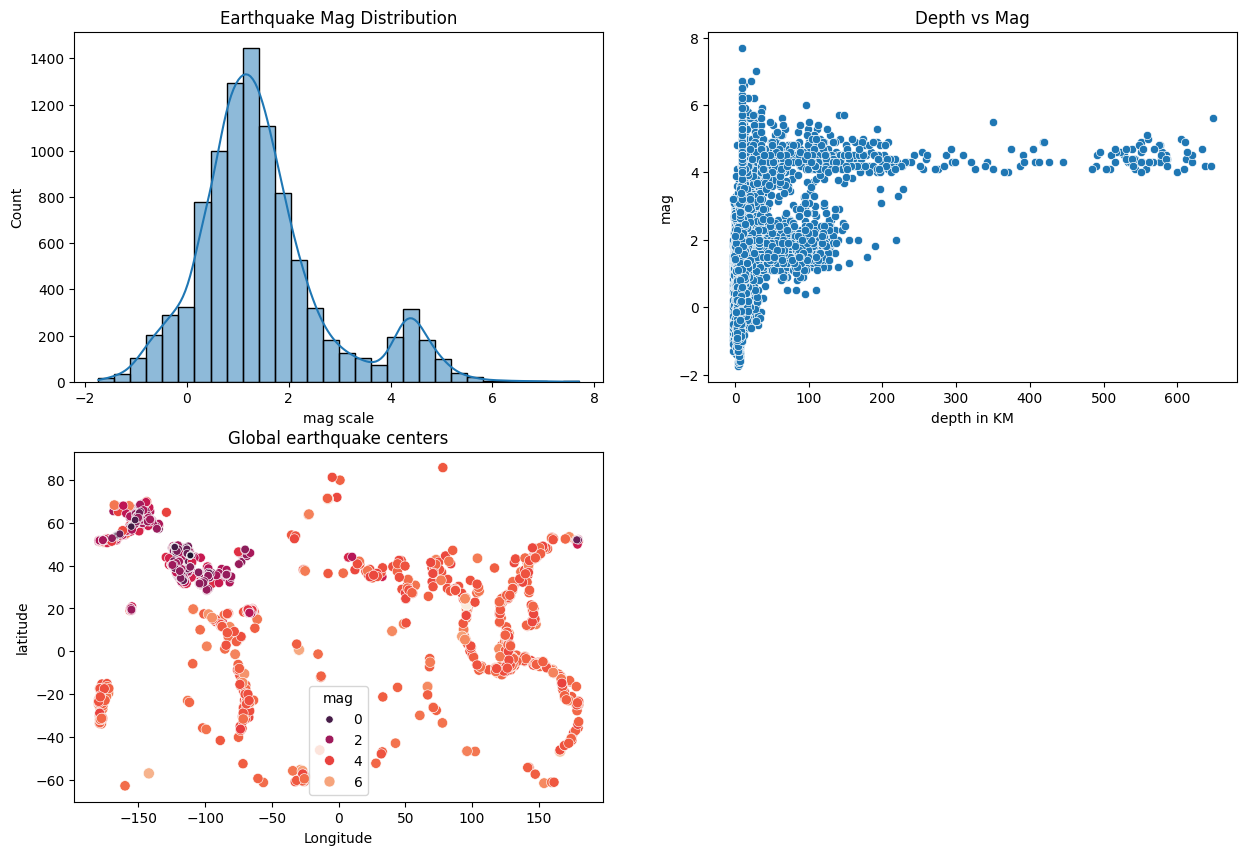

In [15]:
#some basic visuals
plt.figure(figsize=(15,10))  
#don't forget : import matplotlib.pyplot as plt

#first plot  ---subplots
plt.subplot(2,2,1)
plt.title("Earthquake Mag Distribution")
plt.xlabel("mag scale")
sb.histplot(df[label], kde=True, bins=30)
#second plot
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.xlabel("depth in KM")
sb.scatterplot(x='depth', y=label, data=df)

#Globe locations
plt.subplot(2,2,3)
plt.title("Global earthquake centers")
plt.xlabel("Longitude")
plt.ylabel('latitude')
sb.scatterplot(x='longitude',y='latitude',size='mag',data=df,hue='mag',palette='rocket')
#original w/o hue: sb.scatterplot(x='longitude',y='latitude',size=label,data=df)

plt.show()

In [16]:
#getting features and labels

feature_data = df[features]
label_data = df[label]
print(feature_data)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [17]:
#split in training and testing data
train_ft, testing_ft, train_lb, test_lb = train_test_split(feature_data, label_data, test_size=0.2, random_state=100)
#random_state makes same data split into 20% and 80%


In [18]:
#calling Regressor
model = RandomForestRegressor()

In [21]:
trained_model = model.fit(train_ft, train_lb)

In [22]:
predicted_mag = trained_model.predict(testing_ft)
print(predicted_mag)

[0.9134 1.526  0.0616 ... 1.563  1.175  0.9483]


In [23]:
print(test_lb)

8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [25]:
#doing model eval using MSE
error = mean_squared_error(test_lb, predicted_mag)
print("error", error)

error 0.23536574805213034


In [26]:
#only till 4 points
print(f"Model MSE : {error:.4f}")

Model MSE : 0.2354
